# Logistic regression with scikit-learn (binary)
เราจะสอนการใช้ scikit-learn ในการประมาณการ logistic regression โดยการที่เราจะมีการแบ่งข้อมูลออกเป็น train,test เพื่อวัดความแม่นยำข้อมูลด้วย   
ซึ่งขั้นตอนจะมีดังนี้    
*  1.การดึงและตรวจสอบข้อมูล
* 2.การประมาณการข้อมูลโดยใช้ Scikit-learn
* 3.การตรวจสอบความแม่นยำของ model ด้วย confusion matix   

**เพิ่มเติม** หาก code ไหนเหมือนกับการทำ statsmodels เราจะไม่เขียนอธิบายซ้ำ เพื่อนๆสามารถกลับไปดูได้ที่ไฟล์ Logistic regression with statsmodels (binary) 

## 1.การดึงและตรวจสอบข้อมูล

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv ('C:\\Users\\LENOVO\\Desktop\\files for example\\buy_insurance.csv')

In [3]:
data.head()

,age,buy_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age              27 non-null int64
buy_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 512.0 bytes


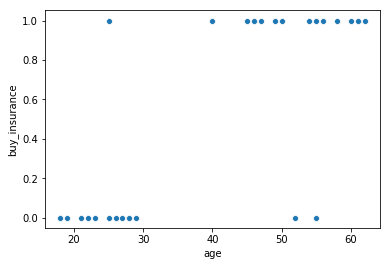

In [5]:
sns.scatterplot(data=data, x='age', y='buy_insurance')

## 2.การประมาณการข้อมูลโดยใช้ Scikit-learn

### แบ่งข้อมูลและประมาณการ

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

* เรียกใช้ function การแบ่งข้อมูล และการประมาณการแบบ logistic regression

In [7]:
X, y = data[['age']] ,data.buy_insurance
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

* สร้าง object แล้วตั้งชื่อว่า X,y และให้ X แสดงค่าออกมาในรูป dataframe และ y อยู่ในรูปของ series เพื่อที่มันจะได้คำนวณหลังบ้านได้ 
* กำหนด test_size .3 คือ 30%ของข้อมูลทั้งหมด
* สร้าง object 4 อัน X_train, X_test, y_train, y_test และใส่คำสั่งให้มันแบ่งข้อมูลออกตามเงื่อนไขในวงเล็บ(แบ่ง X,y ขนาดตามtest_size.3 และให้แบ่งแบบ random_state= 7 (แถ้าเราใส่ none ในการรันแต่ละรอบมันจะสุ่มไม่เหมือนกัน))

In [8]:
X_train.T

,11,12,26,0,25,6,21,24,10,20,8,14,7,19,3,22,4,15
age,28,27,23,22,54,55,26,50,18,21,62,49,60,18,52,40,46,55


In [9]:
y_train

11    0
12    0
26    0
0     0
25    1
6     0
21    0
24    1
10    0
20    0
8     1
14    1
7     1
19    0
3     0
22    1
4     1
15    1
Name: buy_insurance, dtype: int64

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* สร้าง object ตั้งชื่อว่า model แล้วเรียกใช้ function การประมาณการ Logisticregression
* model.fit(X_train,y_train) สั่งให้ประมาณการ

In [11]:
model.intercept_

array([-1.50915144])

In [12]:
model.coef_

array([[0.041637]])

### ต่อมาเราจะนำสมการที่ได้จากการประมาณ X_train มาประมาณ X_test

In [13]:
X_test.T

,2,9,1,5,17,16,13,23,18
age,47,61,25,56,58,25,29,45,19


In [14]:
model.predict_proba(X_test)

array([[0.38988695, 0.61011305],
       [0.26294737, 0.73705263],
       [0.61496391, 0.38503609],
       [0.3052289 , 0.6947711 ],
       [0.2878612 , 0.7121388 ],
       [0.61496391, 0.38503609],
       [0.57485279, 0.42514721],
       [0.40986742, 0.59013258],
       [0.67217713, 0.32782287]])

* ประมาณ X_test ออกมาในรูปของ probability โดยคอลัมน์แรกจะเป็น โอกาสที่จะเกิด y=0 และ จะเป็นโอกาสที่จะเกิด y=1 

In [15]:
model.predict_proba(X_test)[:,1]


array([0.61011305, 0.73705263, 0.38503609, 0.6947711 , 0.7121388 ,
       0.38503609, 0.42514721, 0.59013258, 0.32782287])

* หรือหากต้องการให้แสดงแค่ probability ที่จะเกิด y=1 ใช้คำสั่งด้านบนได้

In [16]:
predicted = model.predict(X_test)
predicted

array([1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

* เป็นคำสั่งให้ประมาณการ X_test ออกมาเป็น y=0,y=1 เลย

In [17]:
y_test.values

array([1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

* เป็นคำสั่งให้แสดงค่า y จริงให้อยู่ในรูป numpy array เพื่อง่ายในการดูเปรียบเทียบกับค่า predict ด้านบนจะเห็นได้ว่า เดาผิดไป แค่ 1 ตำแหน่ง

### ประมาณการเอง (กำหนด X เอง)

* หากเราต้องการที่จะประมาณการเอง เราสามารถทำได้โดยการเขียนสูตรด้านล่างเลย

$$g(z)={\frac {1}{1+e^{-x}}}$$

In [18]:
def g_z(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

In [19]:
g_z(model.intercept_, model.coef_, 50)

array([[0.6393856]])

* สามารถใส่ค่า x ลงไปได้เลย เช่นในที่นี้ใส่ 50 จะได้ว่า probability = 0.63

## 3.การตรวจสอบความแม่นยำของ model ด้วย confusion matix


อันนี้เป็นการวัดความแม่นยำของ model เลย โดยเราได้นำ model ที่เราได้จากจากการประมาณการกับข้อมูล training set แล้วนำ model นี้มาใช้กับข้อมูล testing set 

$$
\begin{bmatrix}
x_{0,0} & x_{0,1} \\
x_{1,0} & x_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
TN&FP \\
FN&TP
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted values</td>
    <td>predicted values</td>
</tr>
<tr>
    <td>actual values</td>
    <td>TN</td>
    <td>FP</td>
</tr>
<tr>
    <td>actual values</td>
    <td>FN</td>
    <td>TP</td>
</tr>
<table>

* **หมายเหตุ** ตารางจะต่างจากที่เรียน ขึ้นอยู่กับ library ที่เราใช้ โดยของ scikit-learn จะมีการสลับตำแหน่งแต่ว่าความหมายยังคงเดิม

In [20]:
from sklearn import metrics

In [21]:
metrics.confusion_matrix(y_test,predicted)

array([[3, 0],
       [1, 5]], dtype=int64)

In [22]:
y_test.values

array([1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [23]:
predicted

array([1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

* จะเห็นได้ว่า model มีความแม่นยำสูง ทายผิดไปแค่ 1 ค่าเท่านั้น

In [24]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

   micro avg       0.89      0.89      0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



* ตารางด้านบนจะบอกค่าคามแม่นยำทั้งหมดของทั้งสองอันเลย คือ y=0 และ y=1

* หรือสามารถเรียกให้แสดงค่าออกมาเป็นรายตัวด้วยคำสั่งด้านล่างเลย

In [25]:
metrics.accuracy_score(y_test, predicted)

0.8888888888888888

In [26]:
metrics.precision_score(y_test, predicted)

1.0

In [27]:
metrics.recall_score(y_test, predicted)

0.8333333333333334

In [28]:
metrics.f1_score(y_test, predicted)

0.9090909090909091

**หากต้องการคำนวณเอง สามารถเขียน code ตามด้านล่างได้เลย**

In [29]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, predicted).ravel()
TN

3

$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

In [30]:
Acurracy=(TP+TN)/(TP+TN+FP+FN)
Acurracy

0.8888888888888888

 $$\mathrm {Precision}={\frac {\mathrm {TP}  }{\mathrm {TP} +\mathrm {FP} }}$$

In [31]:
Precision =(TP)/(TP+FP)
Precision

1.0

 $$\mathrm {Recall}={\frac {\mathrm {TP}  }{\mathrm {TP} +\mathrm {FN} }}$$

In [32]:
Recall = (TP)/(TP+FN)
Recall

0.8333333333333334

$$\mathrm {F-measure}={\frac {\mathrm {2 * Recall * Precision}  }{\mathrm {Recall+Precision}  }}$$

In [33]:
F_measure = 2 * ( Recall*Precision) / (Recall+Precision)
F_measure

0.9090909090909091